In [66]:
import glob, os
import pandas as pd
from pathlib import Path
from nilearn import plotting
from nilearn import image as niimg
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm import cluster_level_inference
from nilearn.glm import threshold_stats_img
from nilearn.image import threshold_img
from nilearn.reporting import get_clusters_table
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm.second_level import make_second_level_design_matrix


In [67]:
symptoms = pd.read_csv('/BICNAS2/tuominen/trsnrm/clinical/TRS_Patients_LC.csv')
symptoms

,ID,Seg1,Seg2,Seg3,Seg4,Seg5,Average LC,Average of 2-4,Sex,Age,...,Positive symptoms,Negative symptoms,General symptoms,Total PANSS,ERT Mean,SANS,Total DST,Standard DST,Total SNS,Blunted
0,1,20.608,26.320,24.802,23.812,15.2040,22.149200,24.978000,1,44,...,7,7,21,35,-0.587874,29,18,100,523.285326,1
1,2,NaN,21.562,24.562,22.538,14.3750,20.759250,22.887333,2,20,...,8,23,24,55,-0.563104,62,11,75,492.120479,2
2,3,22.300,24.875,27.612,17.438,10.8870,20.622400,23.308333,2,30,...,9,17,25,51,-1.448980,50,13,82,492.593753,3
3,4,28.175,27.950,28.700,20.812,16.1500,24.357400,25.820667,2,26,...,11,13,26,50,-0.043276,59,11,75,655.921791,1
4,6,16.925,16.487,19.962,18.288,15.5250,17.437400,18.245667,1,50,...,17,16,25,58,-0.230608,53,14,86,506.639458,2
5,8,18.512,19.825,23.987,15.312,10.0380,17.534800,19.708000,1,25,...,16,13,31,60,-0.171393,43,16,93,529.745407,2
6,9,NaN,20.087,22.087,16.600,9.5125,17.071625,19.591333,1,56,...,19,28,25,72,-1.198846,74,16,93,571.750613,4
7,10,29.750,22.038,25.862,21.983,14.5750,22.841600,23.294333,1,56,...,14,26,42,82,-0.391946,95,13,82,665.951988,4
8,13,20.800,24.413,23.575,22.712,12.7500,20.850000,23.566667,1,29,...,47,16,23,47,-0.377613,50,15,89,552.289054,3
9,501,NaN,19.550,22.688,14.012,6.4750,15.681250,18.750000,1,44,...,68,20,32,68,-2.323405,68,15,89,1148.832845,5


In [68]:
output_dir = '/BICNAS2/tuominen/trsnrm/derivatives/iteration1/fMRI_output_social'
files = glob.glob(f'{output_dir}/*confound-simple_contrast-mov1_sensinput.nii.gz')
files.sort()

In [70]:
subj_list = [ os.path.basename(s).split('_')[0][-3:] for s in files ]
padded_ID_list = [f"{num:03}" for num in symptoms.ID.to_list()]

for subj in subj_list:
    if subj not in padded_ID_list:
        print(f"Subject {subj} not found in symptoms data.")

new_files = []
for f in files:
    subj = os.path.basename(f).split('_')[0][-3:]
    if subj in padded_ID_list:
        new_files.append(f)
print(new_files)
print(len(new_files), len(padded_ID_list))

Subject 015 not found in symptoms data.
Subject 016 not found in symptoms data.
Subject 017 not found in symptoms data.
['/BICNAS2/tuominen/trsnrm/derivatives/iteration1/fMRI_output_social/trs001_ses-001_task-rest_run-01_confound-simple_contrast-mov1_sensinput.nii.gz', '/BICNAS2/tuominen/trsnrm/derivatives/iteration1/fMRI_output_social/trs002_ses-001_task-rest_run-01_confound-simple_contrast-mov1_sensinput.nii.gz', '/BICNAS2/tuominen/trsnrm/derivatives/iteration1/fMRI_output_social/trs003_ses-001_task-rest_run-01_confound-simple_contrast-mov1_sensinput.nii.gz', '/BICNAS2/tuominen/trsnrm/derivatives/iteration1/fMRI_output_social/trs004_ses-001_task-rest_run-01_confound-simple_contrast-mov1_sensinput.nii.gz', '/BICNAS2/tuominen/trsnrm/derivatives/iteration1/fMRI_output_social/trs006_ses-001_task-rest_run-01_confound-simple_contrast-mov1_sensinput.nii.gz', '/BICNAS2/tuominen/trsnrm/derivatives/iteration1/fMRI_output_social/trs008_ses-001_task-rest_run-01_confound-simple_contrast-mov1_sens

In [ ]:
def do_symptom_second_level(new_files, padded_ID_list, symptoms, symptom_name):
    

    extra_info_subjects = pd.DataFrame(
    {
        "subject_label": padded_ID_list,
        symptom_name: symptoms[symptom_name]
    }
    )
    design_matrix = make_second_level_design_matrix(
        padded_ID_list, extra_info_subjects
    )

    second_level_model = SecondLevelModel(smoothing_fwhm=6, mask_img='/usr/local/fsl/data/standard/MNI152_T1_2mm_brain_mask.nii.gz')

    second_level_model = second_level_model.fit(
        new_files,
        design_matrix=design_matrix
    )

    map = second_level_model.compute_contrast(
        second_level_contrast=symptom_name,
        output_type='all'
        )

    #output_filename = f'second_level_contrast-{symptom_name}_z_map.nii.gz'
    #nib.save(z_map, os.path.join(output_dir, output_filename))
    fname = symtom_name.replace(" ", "_")
    disp = plotting.plot_stat_map(map['stat'], threshold=3, display_mode='mosaic', colorbar=True, cmap='coolwarm')
    disp.savefig(os.path.join(output_dir, f'second_level_contrast-{fname}_stat_map.png'))
    plt.close()


In [99]:
symptoms.columns 


Index(['ID', 'Seg1', 'Seg2', 'Seg3', 'Seg4', 'Seg5', 'Average LC',
       'Average of 2-4', 'Sex', 'Age', 'Group', 'CAPE', 'Positive symptoms',
       'Negative symptoms', 'General symptoms', 'Total PANSS', 'ERT Mean',
       'SANS', 'Total DST', 'Standard DST', 'Total SNS', 'Blunted'],
      dtype='object')

In [101]:
do_symptom_second_level(new_files, padded_ID_list, symptoms, symptom_name='SANS')


/tmp/ipykernel_3734784/1549861223.py:10: UserWarning: Attention: Design matrix is singular. Aberrant estimates are expected.
  design_matrix = make_second_level_design_matrix(
/tmp/ipykernel_3734784/1549861223.py:16: UserWarning: [NiftiMasker.fit] Generation of a mask has been requested (imgs != None) while a mask was given at masker creation. Given mask will be used.
  second_level_model = second_level_model.fit(
/usr/local/fsl/lib/python3.11/site-packages/joblib/memory.py:312: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  return self.func(*args, **kwargs)


[SecondLevelModel.compute_contrast] Resampling images

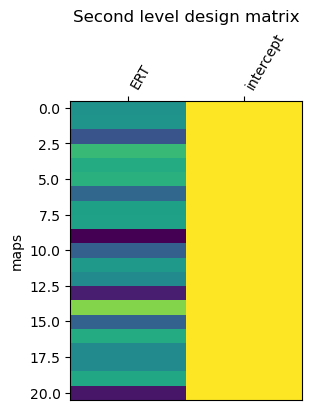

In [ ]:
# here's a code for plotting the design matrix

from nilearn.plotting import plot_design_matrix
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(1, 1, figsize=(3, 4), constrained_layout=True)

ax = plot_design_matrix(design_matrix, axes=ax1)
ax.set_ylabel("maps")
ax.set_title("Second level design matrix", fontsize=12)
plt.show()